# Estudo de Caso: Como a diversificação afeta o risco da carteira?

<hr style="height:3px; border:none; background-color:black;">

Será que quanto mais ativos na carteira, menor será o risco (utilizando a variância como medida de risco)? Esta é uma dúvida que alguns investidores têm na hora de investir. Surge, então, outro ponto: qual é a quantidade ideal de ativos para que o risco seja minimizado?

Para tentar responder a essas dúvidas, utilizaremos a carteira teórica do Ibovespa, o índice mais conhecido que representa a Bolsa de Valores brasileira. Os pesos dos ativos serão definidos de maneira aleatória através de uma função desenvolvida em Python. Os dados serão extraídos da biblioteca Yfinance, e o período selecionado é de '2021-01-01' a '2024-01-01'.

## Importando os dados

In [111]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dados = pd.read_excel('Downloads/Comp_ibov.xlsx')
dados

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,238441689,0.309
1,ALOS3,ALLOS,ON NM,532616595,0.551
2,ALPA4,ALPARGATAS,PN N1,166362038,0.070
3,ABEV3,AMBEV S/A,ON ATZ,4394245879,2.458
4,ARZZ3,AREZZO CO,ON ED NM,62305891,0.155
...,...,...,...,...,...
81,VAMO3,VAMOS,ON NM,498860020,0.214
82,VBBR3,VIBRA,ON NM,1114613709,1.227
83,VIVA3,VIVARA S.A.,ON NM,125912025,0.135
84,WEGE3,WEG,ON NM,1482105837,3.343


In [22]:
ativos = dados['Código'].values
ativos

array(['RRRP3', 'ALOS3', 'ALPA4', 'ABEV3', 'ARZZ3', 'ASAI3', 'AZUL4',
       'B3SA3', 'BBSE3', 'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5',
       'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3',
       'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3',
       'ELET3', 'ELET6', 'EMBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3',
       'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'NTCO3', 'SOMA3', 'HAPV3',
       'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11',
       'RENT3', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'BEEF3', 'MRVE3',
       'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'RECV3', 'PRIO3', 'PETZ3',
       'RADL3', 'RAIZ4', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11', 'SMTO3',
       'CSNA3', 'SLCE3', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3', 'TOTS3',
       'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VBBR3', 'VIVA3',
       'WEGE3', 'YDUQ3'], dtype=object)

In [23]:
quant_atv = ativos.size
quant_atv

86

In [24]:
data_inicial = '2021-01-01'
data_final = '2024-01-01'

In [25]:
ativos = [ticker + '.SA' for ticker in ativos]
ativos

['RRRP3.SA',
 'ALOS3.SA',
 'ALPA4.SA',
 'ABEV3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBSE3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BPAC11.SA',
 'CRFB3.SA',
 'CCRO3.SA',
 'CMIG4.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CPFE3.SA',
 'CMIN3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENGI11.SA',
 'ENEV3.SA',
 'EGIE3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'NTCO3.SA',
 'SOMA3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'RENT3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'BEEF3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'RECV3.SA',
 'PRIO3.SA',
 'PETZ3.SA',
 'RADL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RAIL3.SA',
 'SBSP3.SA',
 'SANB11.SA',
 'SMTO3.SA',
 'CSNA3.SA',
 'SLCE3.SA',
 'SUZB3.SA',
 'TAEE11.SA',
 'VIVT3.SA',
 'TIMS3.SA',
 'TOTS

In [46]:
preços = yf.download(ativos, start = data_inicial, end = data_final)['Adj Close']
preços.head()

[*********************100%%**********************]  86 of 86 completed


Ticker,ABEV3.SA,ALOS3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,13.386031,NaN,41.159180,63.056492,NaN,37.730000,17.423172,14.515561,15.783032,17.821547,...,21.024250,9.920060,12.068114,63.861267,NaN,17.426195,27.053837,36.894653,35.260799,32.230835
2021-01-05,13.671394,NaN,41.178944,62.092094,NaN,38.200001,17.457460,14.364958,15.707579,17.712894,...,20.887827,9.837804,12.197359,64.936577,NaN,17.625580,25.788218,36.581455,37.425034,32.391987
2021-01-06,13.948106,NaN,38.935696,58.419983,NaN,36.669998,17.171736,14.693190,16.102442,18.299952,...,20.758982,9.718534,12.787031,67.066208,NaN,17.370369,25.007908,36.171860,38.417358,31.102758
2021-01-07,13.878928,NaN,38.243946,58.345791,NaN,36.049999,17.651747,15.276284,16.497301,18.785788,...,20.395189,10.014654,13.400940,71.444191,NaN,17.689381,25.045971,35.256313,40.005093,31.491425
2021-01-08,14.294000,NaN,40.220375,59.440010,NaN,36.599998,17.911751,15.365105,16.370152,18.623846,...,21.206144,10.273760,13.336319,71.220764,NaN,18.183857,25.217260,36.179893,42.424492,32.562618


In [47]:
retornos = preços.pct_change()
retornos = retornos.dropna()
retornos.head()

Ticker,ABEV3.SA,ALOS3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-19,-0.000798,-0.001364,0.005487,-0.013947,0.015712,-0.008514,-0.011680,0.007736,0.006385,0.004875,...,0.005510,-0.001012,-0.012945,-0.014382,-0.013580,0.012579,-0.001550,-0.001309,-0.010207,0.007563
2023-10-20,-0.002396,0.002732,-0.016371,0.003920,0.008189,-0.035129,0.013636,-0.003232,-0.012688,-0.018711,...,0.011415,0.003546,-0.024590,-0.027010,0.005006,0.012940,0.005045,-0.013980,-0.003830,-0.019303
2023-10-23,-0.000801,0.038147,0.031900,0.020370,0.039711,0.046117,0.014350,-0.001419,0.000803,0.001412,...,0.009932,-0.004038,-0.003361,-0.001914,0.012453,0.004088,0.032046,-0.001329,0.002662,0.008201
2023-10-24,0.003205,0.020560,0.052419,0.006821,-0.012153,0.020882,0.025641,-0.004668,0.002408,0.000000,...,-0.002682,0.008616,0.006745,0.022858,-0.013530,0.012723,0.011598,0.018462,0.032743,0.005965
2023-10-25,-0.006390,-0.007715,-0.005109,-0.023133,-0.030756,-0.026515,-0.005172,0.000204,-0.006405,-0.002821,...,-0.004034,0.013568,-0.016750,-0.000938,-0.042394,0.003517,-0.044379,-0.007202,-0.101114,-0.014016


## Criando a função que atribui pesos aleatórios para os ativos

In [104]:
def calcula_cov(quant_atv, retornos, ativos):
    variancia = []     #Lista vazia  
    for quantidade in range(2, quant_atv + 1, 2):     #Selecionando ativos de 2 em 2 iniciando no ativo 2 até o 86 (2,4,6,...,86)
        aux = np.random.rand(quantidade, 1)[:,0]     #Gerando os pesos aleatórios
        peso = aux/sum(aux)     #Garantindo que o peso total dos ativos será 1
        variancia.append((peso.dot(retornos[ativos[:quantidade]].cov())).dot(peso))     #"Apendando" as variâncias dos ativos na lista vazia criada acima
    return variancia

<hr style="height:2px; border:none; background-color:black;">

A preferência por calcular a variancias dos ativos de 2 em 2 é para evitar o Overfitting, isto é, adicionar ativos um a um pode levar a ajustes excessivos e superestimação da diversificação. Adicionar de 2 em 2 pode proporcionar uma melhor média dos pesos e variâncias, evitando essas armadilhas. Além disso, avaliar carteiras com intervalos de 2 ainda fornece informações suficientes sobre a tendência de como a diversificação afeta o risco.

<hr style="height:2px; border:none; background-color:black;">

In [105]:
variancias = calcula_cov(quant_atv, retornos, ativos)
variancias

[0.0002490902527452804,
 0.0002880429784928232,
 0.00021020927423673357,
 0.00036617140540271215,
 0.0002513618856701722,
 0.0001417389879935846,
 0.0002147668633218376,
 0.00016144534315692938,
 0.0001669225760205539,
 0.00015778126666267524,
 0.0001771428047537539,
 0.00016555098936045336,
 0.00015857268329655343,
 0.00018175726046329923,
 0.00016764070643931795,
 0.00013577654928490851,
 0.00017410499020427433,
 0.00015698320773591942,
 0.0001781862246936673,
 0.00015226025851051593,
 0.00018470351074949176,
 0.000192311082024808,
 0.00017717380836550385,
 0.00015973883124515038,
 0.00020275933528304102,
 0.000187419720308169,
 0.0002204561863984313,
 0.00020849829114034186,
 0.00018894515883402567,
 0.0002078982908287699,
 0.00018232294541176426,
 0.00019995974455841046,
 0.00018450696007883753,
 0.00017554144144529544,
 0.00017364591988981362,
 0.0001655457649786271,
 0.000158281960943798,
 0.00018223573960303438,
 0.00016177011951331005,
 0.00014190302066038055,
 0.00016507370892

## Plotando o gráfico da relação entre a variância e a quantidade de ativos

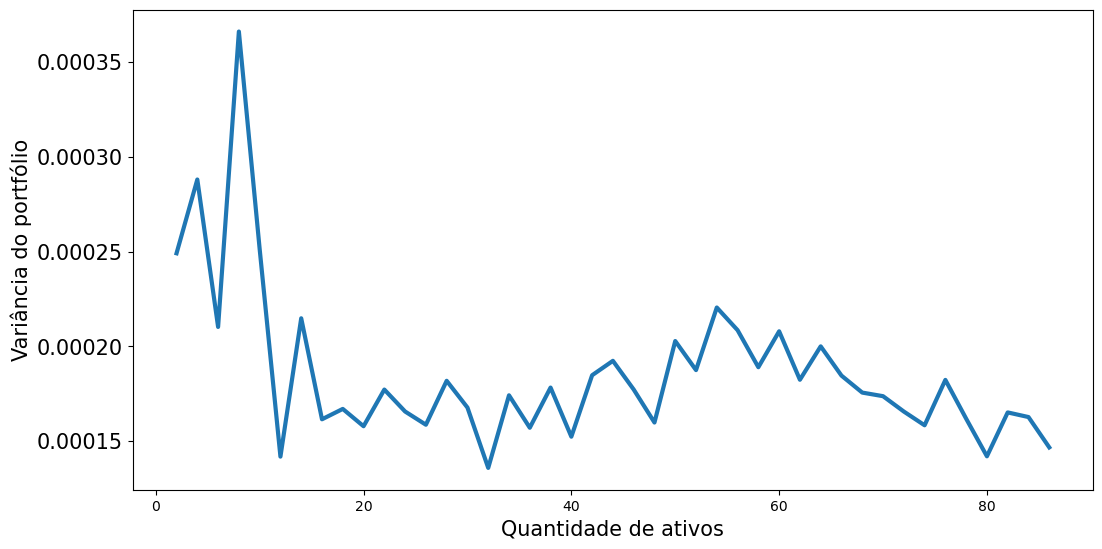

In [106]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(range(2,quant_atv+1,2), variancias, linewidth = 3)
ax1.set_xlabel('Quantidade de ativos', fontsize = 15)
ax1.set_ylabel('Variância do portfólio', fontsize = 15)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 15)
plt.show()

## Algumas conclusões

<hr style="height:2px; border:none; background-color:black;">

Nossa análise mostra que, ao incluir 20 ativos na carteira, a variância é significativamente reduzida em comparação com carteiras menores. No entanto, entre 30 e 40 ativos, o risco diminui ainda mais, o que é um ponto positivo. Por outro lado, gerenciar um número maior de ativos pode se tornar bastante complexo e desafiador, especialmente do ponto de vista estratégico.

Da mesma forma, embora uma carteira com cerca de 80 ativos apresente uma variância muito baixa, a quantidade elevada de posições pode tornar a gestão um verdadeiro desafio. Portanto, enquanto mais ativos podem oferecer uma maior redução no risco, é fundamental encontrar um equilíbrio entre a redução do risco e a complexidade da administração do portfólio.

Obs: Este arquivo foi feito com base no Módulo 5 - Aula 08 do curso Python para Mercado Financeiro da empresa Trading com Dados